# Busqueda visual parte 2

## 1. Cargar el modelo

In [1]:
from tensorflow.keras import models, applications
from tensorflow.keras.preprocessing import image

In [6]:
! mkdir data
! cp -r drive/MyDrive/clases/datasets/cloth/data/data/ data/

In [7]:
! cp drive/MyDrive/clases/datasets/cloth/data/class_model.h5 data/class_model.h5

In [2]:
feat_model = applications.MobileNet(include_top=False, input_shape=(224,224,3))

17235968/17225924 [==============================] - 0s 0us/step


In [8]:
model_path = 'data/class_model.h5'
clas_model = models.load_model(model_path)

## 2. Busqueda de las imagenes

In [3]:
labels = ['T-Shirt', 'Longsleeve', 'Pants', 'Shoes', 'Shirt',
          'Dress', 'Outwear', 'Shorts', 'Not sure', 'Hat', 
          'Skirt', 'Polo', 'Undershirt', 'Blazer', 'Hoodie']
labels = sorted(labels)

In [5]:
print(labels)

['Blazer', 'Dress', 'Hat', 'Hoodie', 'Longsleeve', 'Not sure', 'Outwear', 'Pants', 'Polo', 'Shirt', 'Shoes', 'Shorts', 'Skirt', 'T-Shirt', 'Undershirt']


Tomar la imagen

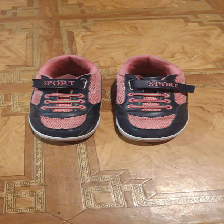

In [33]:
img_path = 'data/data/test/Shoes/188.jpg'
img = image.load_img(img_path, target_size=(224,224))
img

Predicciones

In [10]:
import numpy as np

In [34]:
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = applications.mobilenet.preprocess_input(img)*1./255

In [35]:
img_feats = feat_model.predict(img)
img_class = clas_model.predict(img_feats)

Comparacion de los mapas de caracteristicas

In [36]:
prediction = labels[np.argmax(img_class)]
print('La clase es:', prediction)

La clase es: Shoes


In [37]:
path_label = 'data/data/train/' + prediction

In [26]:
#path_label = 'data/data/train/' + 'Dress'

In [38]:
import os
from scipy.spatial import distance as dist

In [39]:
min_euc = 1000000
max_cos = 0
image_train_f = img_feats.flatten()
for file in os.listdir(path_label):
  image_test = os.path.join(path_label, file)
  image_test = image.load_img(image_test, target_size=(224,224))
  image_test = image.img_to_array(image_test)
  image_test = np.expand_dims(image_test, axis=0)
  image_test = applications.mobilenet.preprocess_input(image_test)*1./255
  # Prediccion
  image_test_f = feat_model.predict(image_test)
  image_test_f = image_test_f.flatten()
  # Distancia euclideana
  euc_dist = dist.euclidean(image_train_f, image_test_f)
  if euc_dist<min_euc:
    min_euc = euc_dist
    img_euc = os.path.join(path_label, file)
  # Distancia coseno
  dot_prod = np.dot(image_test_f, image_train_f)
  normA = np.linalg.norm(image_test_f)
  normB = np.linalg.norm(image_train_f)
  cos_dist = dot_prod/(normA*normB)
  if cos_dist>max_cos:
    max_cos = cos_dist
    img_cos = os.path.join(path_label, file)

Observamos los resultados

Original


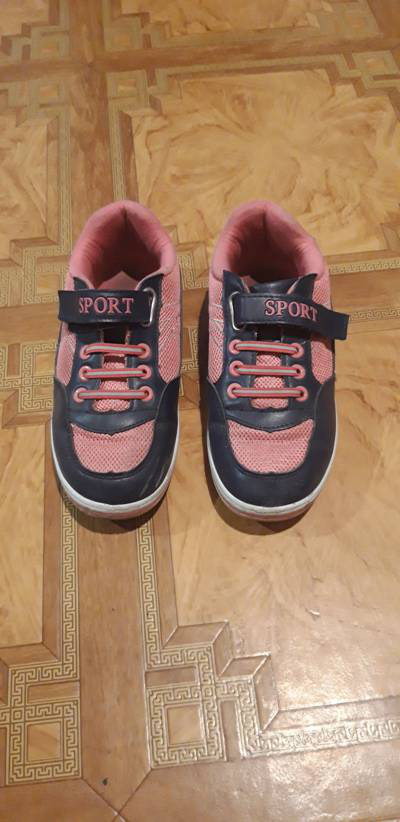

In [40]:
img_orig = image.load_img(img_path)
print('Original')
img_orig

distancia euclideana


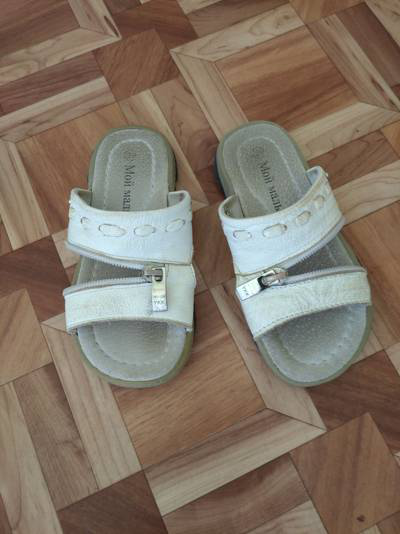

In [41]:
img_e = image.load_img(img_euc)
print('distancia euclideana')
img_e

Similaridad coseno


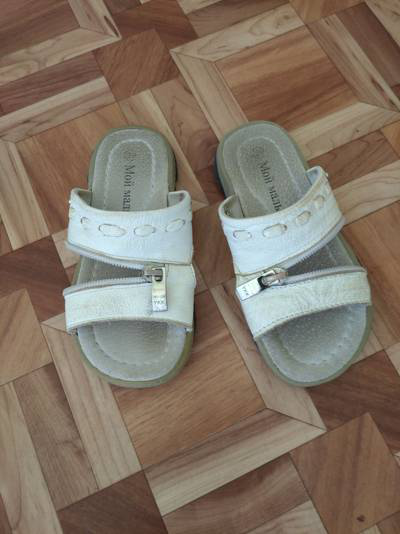

In [42]:
img_c = image.load_img(img_cos)
print('Similaridad coseno')
img_c

In [32]:
max_cos

0.98664516

## 3. Mejora del modelo

In [46]:
feat_model2 = applications.InceptionV3(include_top=False, input_shape=(299,299,3))

87924736/87910968 [==============================] - 1s 0us/step


In [47]:
feat_model2.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

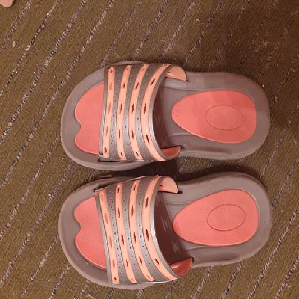

In [53]:
img_path = 'data/data/test/Shoes/212.jpg'
img = image.load_img(img_path, target_size=(299,299))
img

In [54]:
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = applications.inception_v3.preprocess_input(img)*1./255

In [65]:
path_label = 'data/data/test/' + 'Shoes'

In [67]:
img_feats = feat_model2.predict(img)

In [68]:
image_train_f = img_feats.flatten()

In [69]:
min_euc = 1000000
max_cos = 0
image_train_f = img_feats.flatten()
for file in os.listdir(path_label):
  image_test = os.path.join(path_label, file)
  image_test = image.load_img(image_test, target_size=(299,299))
  image_test = image.img_to_array(image_test)
  image_test = np.expand_dims(image_test, axis=0)
  image_test = applications.inception_v3.preprocess_input(image_test)*1./255
  # Prediccion
  image_test_f = feat_model2.predict(image_test)
  image_test_f = image_test_f.flatten()
  # Distancia euclideana
  euc_dist = dist.euclidean(image_train_f, image_test_f)
  if euc_dist<min_euc:
    min_euc = euc_dist
    img_euc = os.path.join(path_label, file)
  # Distancia coseno
  dot_prod = np.dot(image_test_f, image_train_f)
  normA = np.linalg.norm(image_test_f)
  normB = np.linalg.norm(image_train_f)
  cos_dist = dot_prod/(normA*normB)
  if cos_dist>max_cos:
    max_cos = cos_dist
    img_cos = os.path.join(path_label, file)

Original


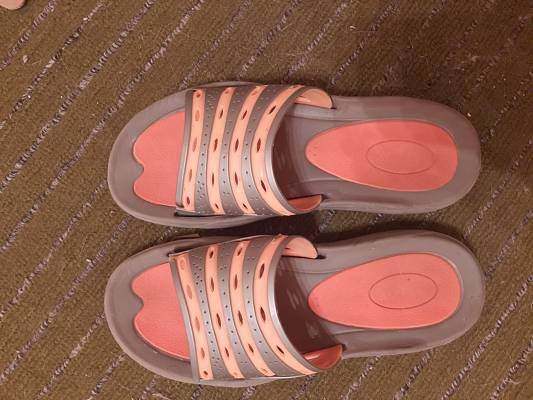

In [70]:
img_orig = image.load_img(img_path)
print('Original')
img_orig

Similaridad coseno


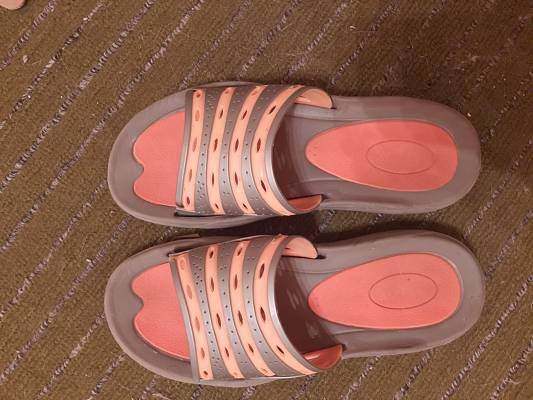

In [71]:
img_c = image.load_img(img_cos)
print('Similaridad coseno')
img_c

distancia euclideana


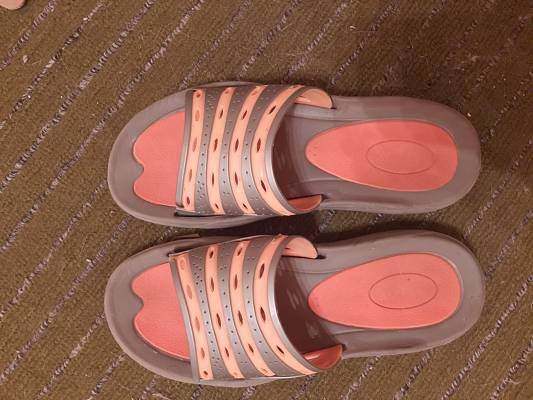

In [72]:
img_e = image.load_img(img_euc)
print('distancia euclideana')
img_e

In [73]:
max_cos

1.0

In [74]:
min_euc

0.0